In [7]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [14]:
agg1_1.head()

,province_count,province_cumulative_count,province_reverse_cumulative_count,instance_id,creative_type_count,creative_type_cumulative_count,creative_type_reverse_cumulative_count,model_count,model_cumulative_count,model_reverse_cumulative_count,app_cate_id_count,app_cate_id_cumulative_count,app_cate_id_reverse_cumulative_count,campaign_id_count,campaign_id_cumulative_count,campaign_id_reverse_cumulative_count,adid_count,adid_cumulative_count,adid_reverse_cumulative_count,creative_tp_dnf_count,creative_tp_dnf_cumulative_count,creative_tp_dnf_reverse_cumulative_count,f_channel_count,f_channel_cumulative_count,f_channel_reverse_cumulative_count,advert_name_count,advert_name_cumulative_count,advert_name_reverse_cumulative_count,creative_is_download_count,creative_is_download_cumulative_count,creative_is_download_reverse_cumulative_count,orderid_count,orderid_cumulative_count,orderid_reverse_cumulative_count,advert_industry_inner_count,advert_industry_inner_cumulative_count,advert_industry_inner_reverse_cumulative_count,devtype_count,devtype_cumulative_count,devtype_reverse_cumulative_count,creative_size_count,creative_size_cumulative_count,creative_size_reverse_cumulative_count,nnt_count,nnt_cumulative_count,nnt_reverse_cumulative_count,app_id_count,app_id_cumulative_count,app_id_reverse_cumulative_count,advert_id_count,advert_id_cumulative_count,advert_id_reverse_cumulative_count,time_hour_count,time_hour_cumulative_count,time_hour_reverse_cumulative_count,user_tags_count,user_tags_cumulative_count,user_tags_reverse_cumulative_count,make_count,make_cumulative_count,make_reverse_cumulative_count,carrier_count,carrier_cumulative_count,carrier_reverse_cumulative_count,osv_count,osv_cumulative_count,osv_reverse_cumulative_count,creative_id_count,creative_id_cumulative_count,creative_id_reverse_cumulative_count,city_count,city_cumulative_count,city_reverse_cumulative_count,os_count,os_cumulative_count,os_reverse_cumulative_count,creative_is_jump_count,creative_is_jump_cumulative_count,creative_is_jump_reverse_cumulative_count,inner_slot_id_count,inner_slot_id_cumulative_count,inner_slot_id_reverse_cumulative_count,creative_has_deeplink_count,creative_has_deeplink_cumulative_count,creative_has_deeplink_reverse_cumulative_count,os_name_count,os_name_cumulative_count,os_name_reverse_cumulative_count
699852,122796,89307,33488,12204730147108,711966,478878,233087,63,39,23,70415,47672,22742,429744,277960,151783,786,628,157,532692,321629,211062,961897,644564,317332,429941,278096,151844,1022076,683628,338447,786,628,157,429941,278096,151844,1037966,696884,341081,537764,324804,212959,178674,113192,65481,6248,4230,2017,429941,278096,151844,21200,13561,7638,1,0,0,151572,102724,48847,778097,524681,253415,62124,40573,21550,8323,5033,3289,26255,20234,6020,948043,644433,303609,1022076,683628,338447,6248,4230,2017,1041372,699581,341790,948043,644433,303609
443463,44633,17966,26666,33640746791159,711966,305396,406569,1901,866,1034,303758,125359,178398,429744,173989,255754,36799,21566,15232,173814,93186,80627,961897,407284,554612,429941,174072,255868,1022076,431408,590667,44787,21566,23220,429941,174072,255868,1037966,441413,596552,254139,129402,124736,60489,25281,35207,201791,89202,112588,429941,174072,255868,40547,16564,23982,1,0,0,215457,90394,125062,778097,330559,447537,92912,38973,53938,98425,52549,45875,16200,6521,9678,948043,407750,540292,1022076,431408,590667,201770,89187,112582,1041372,443259,598112,948043,407750,540292
728971,44633,29538,15095,37672601301929,711966,495247,216719,3664,38,25,334324,122805,60088,151014,292238,137505,22160,1570,480,532692,332438,200254,961897,670140,291757,151014,292379,137561,1022076,712547,309529,22160,2445,926,360021,292379,137561,1037966,725840,312126,537764,335763,202001,780942,118097,60576,207032,6360,2431,151014,292379,137561,47134,37546,9588,1,214773,108228,215457,568,200,778097,545384,232713,149902,42477,19646,22160,25788,9626,16200,2027,964,948043,670661,277382,1022076,712547,309529,207032,6360,2431,10413

In [2]:
agg1_1 = pd.read_pickle('X_fe_agg_1_count.pkl')
agg1_2 = pd.read_pickle('X_fe_agg_1_time_count.pkl')
agg1_3 = pd.read_pickle('X_fe_agg_1_time_next.pkl')

agg1_1.shape, agg1_2.shape, agg1_3.shape

((1041674, 88), (1041674, 175), (1041674, 59))

In [3]:
agg2_1 = pd.read_pickle('X_fe_agg_2_count.pkl')
agg2_2 = pd.read_pickle('X_fe_agg_2_time_count.pkl')
agg2_3 = pd.read_pickle('X_fe_agg_2_time_next.pkl')

agg2_1.shape, agg2_2.shape, agg2_3.shape

((1041674, 1219), (1041674, 2437), (1041674, 813))

In [4]:
train = pd.read_pickle('/home/kai/data/xunfei_match/train.pkl')
test = pd.read_pickle('/home/kai/data/xunfei_match/test.pkl')

In [5]:
train = train[['instance_id','click']].copy()
test = test[['instance_id']].copy()

df = pd.concat([train, test], sort=False)
df.shape
df.sort_values(by='instance_id', inplace=True)

In [8]:
for X_fe in tqdm([agg1_1,agg1_2,agg1_3, agg2_1, agg2_2, agg2_3]):
    X_fe.sort_values('instance_id', inplace=True)
    assert np.sum(X_fe.instance_id.values != df.instance_id.values) == 0
    for col in X_fe.columns:
        if col == 'instance_id':
            continue
        else:
            df[col] = X_fe[col].values
    print(df.shape)

 17%|█▋        | 1/6 [00:00<00:01,  3.53it/s]

(1041674, 89)


 33%|███▎      | 2/6 [00:01<00:03,  1.10it/s]

(1041674, 263)


 50%|█████     | 3/6 [00:02<00:02,  1.06it/s]

(1041674, 321)


 67%|██████▋   | 4/6 [00:21<00:10,  5.46s/it]

(1041674, 1539)


 83%|████████▎ | 5/6 [01:33<00:18, 18.68s/it]

(1041674, 3975)


100%|██████████| 6/6 [01:51<00:00, 18.55s/it]

(1041674, 4787)


In [12]:
train = df[~df['click'].isnull()]
test = df[df['click'].isnull()]

In [10]:
not_feats = ['instance_id', 'click'] 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1001650, 4787) (40024, 4787) (1000, 4787)
MEAN: train(1001650) vs holdout(1000):  0.19845954175610242 0.21
MEAN: train(858556) vs valid(143094):  0.1984588075792377 0.198463946776245


/home/kai/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1040: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	training's binary_logloss: 0.417466	valid_1's binary_logloss: 0.423489
[200]	training's binary_logloss: 0.411826	valid_1's binary_logloss: 0.422956
[300]	training's binary_logloss: 0.406875	valid_1's binary_logloss: 0.422897
[400]	training's binary_logloss: 0.402233	valid_1's binary_logloss: 0.42283
[500]	training's binary_logloss: 0.397917	valid_1's binary_logloss: 0.422973
[600]	training's binary_logloss: 0.393787	valid_1's binary_logloss: 0.423059
[700]	training's binary_logloss: 0.389842	valid_1's binary_logloss: 0.423215
[800]	training's binary_logloss: 0.385893	valid_1's binary_logloss: 0.423365
[900]	training's binary_logloss: 0.382103	valid_1's binary_logloss: 0.423479
[1000]	training's binary_logloss: 0.378392	valid_1's binary_logloss: 0.423714
Fold  1 [ 1000] binary_logloss : ho: 0.403422 / te: 0.423714 / tr: 0.378392 (diff: 0.020291)
Full HO score 0.677892
FULL HO mean 0.403422, std 0.000000
FULL TE mean 0.423714, std 0.000000
FULL TR mean 0.378392, std 0.000000
FULL D

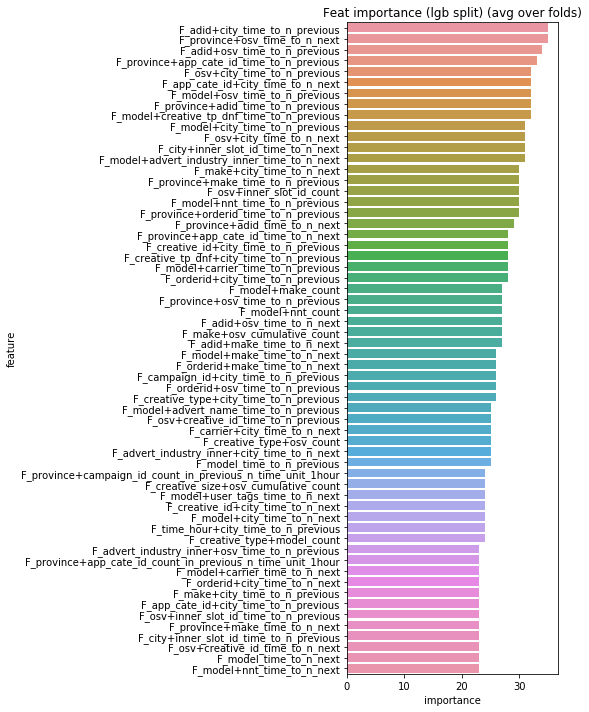

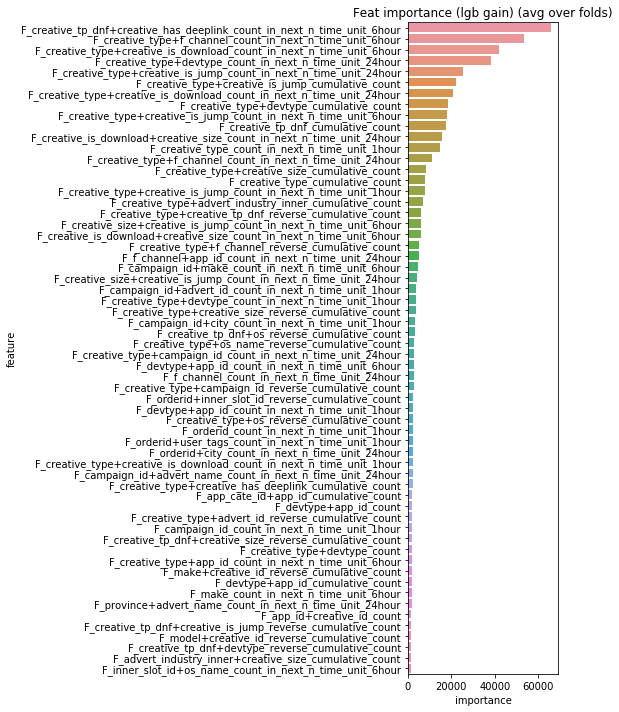

In [13]:
from sklearn.metrics import log_loss
%load_ext autoreload
%autoreload 2
import lgb_xgb_feimp as lxf

################################ cat cols ###################################################
# lr0.01: best 5609
rounds = 1000 
only_cv = False 
break_after_fold1 = True
save_fe_imp = True
tag = 'simple_lgb'
lgb_res = lxf.kfold_lightgbm(None, train, test, train.tail(1000), 7, 7, 'lgb_{}.csv'.format(tag), 'lgb_fe_img_{}'.format(tag), True, False, colsample=0.1, lr=0.1, max_depth=-1, num_leaves=31, rounds=rounds, mode='lgb', cat_cols=[], target='click', id_feat='instance_id', metric='binary_logloss', metric_func=log_loss, test_target='predicted_score', not_feats=not_feats, only_cv=only_cv, cv_early_stop=300, break_after_fold1=break_after_fold1, save_fe_imp=save_fe_imp)

In [ ]:
[100]	cv_agg's binary_logloss: 0.421415 + 0.000902517
[200]	cv_agg's binary_logloss: 0.421105 + 0.000933186
[300]	cv_agg's binary_logloss: 0.421092 + 0.000953092